Form Score All-Rounder Score = (Batting Form Score + Bowling Form Score) 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def analyze_and_visualize(df):
    # Define features for analysis.
    features = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'HS', 'Bat_Ave', 'BF', 'Bat_SR', 
                "100's", "50's", "Zeros", '4s', '6s', 'Bowl_Mat', 'Bowl_Inns', 'Overs', 'Mdns', 'Bowl_Runs', 
                'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
    
    # Check if all features exist in the DataFrame
    missing_features = [col for col in features if col not in df.columns]
    if missing_features:
        raise ValueError(f"The following required columns are missing in the DataFrame: {missing_features}")
    
    # Select features from the DataFrame
    df_analysis = df[features]
    
    # Replace infinities and NaN values with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [5]:

def calculate_allrounder_formula_components(df):
    """
    Calculates the components of the All-Rounder Consistency Score formula.
    
    Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) / 2 
    """
    df_components = df.copy()
    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Bat_Mat'] = pd.to_numeric(df_components['Bat_Mat'], errors='coerce')
    df_components['Bat_Inns'] = pd.to_numeric(df_components['Bat_Inns'], errors='coerce')
    df_components['NO'] = pd.to_numeric(df_components['NO'], errors='coerce')
    df_components['Bat_Runs'] = pd.to_numeric(df_components['Bat_Runs'], errors='coerce')
    df_components['BF'] = pd.to_numeric(df_components['BF'], errors='coerce')
    df_components['Bat_Ave'] = pd.to_numeric(df_components['Bat_Ave'], errors='coerce')
    df_components["100's"] = pd.to_numeric(df_components["100's"], errors='coerce')
    df_components["50's"] = pd.to_numeric(df_components["50's"], errors='coerce')
    df_components['4s'] = pd.to_numeric(df_components['4s'], errors='coerce')
    df_components['6s'] = pd.to_numeric(df_components['6s'], errors='coerce')
    df_components['Bat_SR'] = pd.to_numeric(df_components['Bat_SR'], errors='coerce')
    df_components["Zeros"] = pd.to_numeric(df_components["Zeros"], errors='coerce')
    df_components['Bowl_Inns'] = pd.to_numeric(df_components['Bowl_Inns'], errors='coerce')
    df_components['Bowl_Mat'] = pd.to_numeric(df_components['Bowl_Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Bowl_Ave'] = pd.to_numeric(df_components['Bowl_Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['Bowl_SR'] = pd.to_numeric(df_components['Bowl_SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')
    df_components['Mdns'] = pd.to_numeric(df_components['Mdns'], errors='coerce')

    
    df_components = df_components.replace([np.inf, -np.inf], 0).fillna(0)

    # Perform calculations, ensure float division and handle potential NaN values
    # Perform calculations, ensuring float division and handling potential NaN values
    df_components['Inns_per_Mat_Bat'] = df_components['Bat_Inns'].astype(float) / df_components['Bat_Mat'].astype(float)
    df_components['NO_per_Inns'] = df_components['NO'].astype(float) 
    df_components['Runs_per_BF'] = df_components['Bat_SR'].astype(float)
    df_components['Ave_Score_Bat'] = df_components['Bat_Ave'].astype(float)  # Direct Ave
    df_components['50s100s_per_Inns'] = (df_components["50's"].astype(float) + 2 * df_components["100's"].astype(float)) 
    df_components['Bat_Runs'] = df_components["Bat_Runs"].astype(float) 
    df_components['boundary'] = df_components['4s'].astype(float) + df_components['6s'].astype(float) 
    df_components['Zeros_per_Inns'] = df_components["Zeros"].astype(float) 
    
    df_components['Inns_per_Mat_Bowl'] = df_components['Bowl_Inns'].astype(float) / df_components['Bowl_Mat'].astype(float) # Ensure float division
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) 
    df_components['Ave_Score_Bowl'] = df_components['Bowl_Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['Bowl_SR'].astype(float) / 100
    df_components['4W5W_per_Inns'] = (df_components['4W'].astype(float) + 1.25 *  df_components['5W'].astype(float)) 
    df_components['Mdns_per_Overs'] = df_components['Mdns'].astype(float) 

    return df_components


In [6]:
data = pd.read_excel("../../cleaned last season/allroundersetlastseason_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")

Data types of your columns before calculation:


In [7]:
numeric_cols = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'BF', 'Bat_Ave', "100's", "50's", "Zeros", 'Bowl_Inns', 'Bowl_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W', 'Mdns']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Bat_Inns', 'Bowl_Inns', 'Bat_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_allrounder_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
   'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Bat_Runs',
    'boundary',
    'Zeros_per_Inns',
    'Inns_per_Mat_Bowl',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs' 
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player                 object
Bat_Mat                 int64
Bat_Inns                int64
NO                      int64
Bat_Runs                int64
HS                      int64
Bat_Ave               float64
BF                      int64
Bat_SR                float64
100's                   int64
50's                    int64
Zeros                   int64
4s                      int64
6s                      int64
Bowl_Mat                int64
Bowl_Inns               int64
Overs                 float64
Mdns                    int64
Bowl_Runs               int64
Wkts                    int64
Bowl_Ave              float64
Econ                  float64
Bowl_SR               float64
4W                      int64
5W                      int64
MostCommonPosition      int64
Type                   object
dtype: object

Number of NaN values BEFORE removing:
Bat_Inns     0
Bowl_Inns    0
Bat_Mat      0
Overs        0
Wkts         0

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_allrounder_consistency_components(df_components):
    features = [
       'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Bat_Runs',
    'boundary',
    'Zeros_per_Inns',
    'Inns_per_Mat_Bowl',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs' 
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Allrounder Consistency Formula Components')
    plt.show()

    return df_analysis


                   Inns_per_Mat_Bat  NO_per_Inns  Runs_per_BF  Ave_Score_Bat  \
Inns_per_Mat_Bat           1.000000    -0.053166     0.120974       0.308846   
NO_per_Inns               -0.053166     1.000000     0.168146       0.575894   
Runs_per_BF                0.120974     0.168146     1.000000       0.481198   
Ave_Score_Bat              0.308846     0.575894     0.481198       1.000000   
50s100s_per_Inns           0.382932     0.138722     0.218721       0.667116   
Bat_Runs                   0.386468     0.319092     0.318362       0.761434   
boundary                   0.404714     0.253548     0.377697       0.729789   
Zeros_per_Inns             0.219563    -0.064765    -0.163298      -0.250757   
Inns_per_Mat_Bowl         -0.387393    -0.057846    -0.327045      -0.332706   
Wkts_per_Overs            -0.390526     0.185196    -0.154374      -0.059880   
Ave_Score_Bowl             0.099105    -0.069361     0.252847       0.022455   
Econ_Rate                  0.075821     

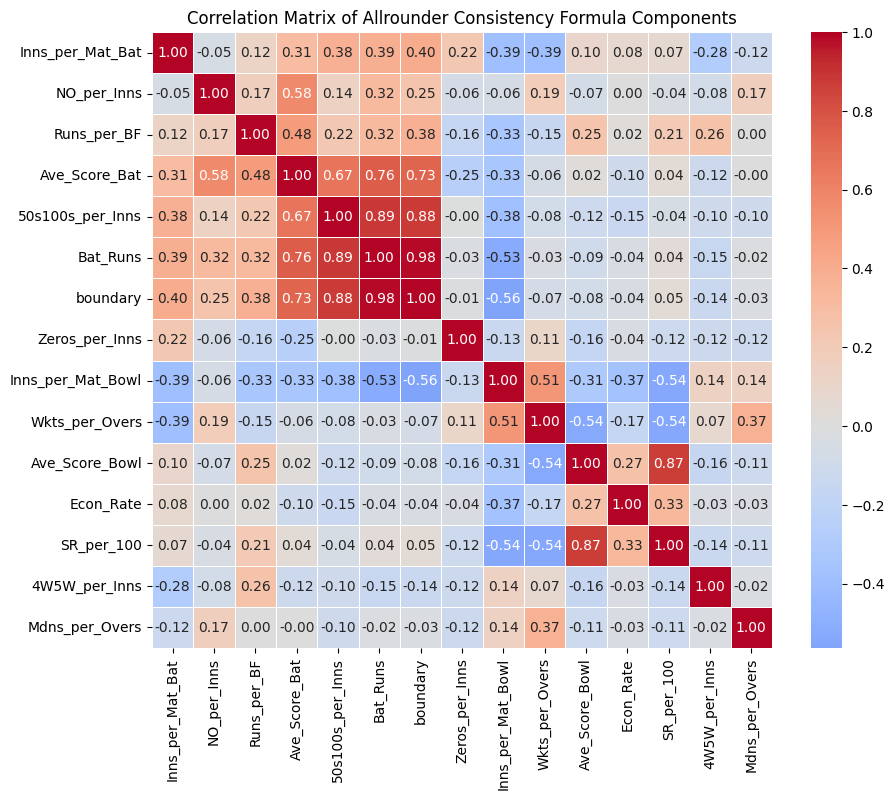

In [9]:
analyzed_df = analyze_allrounder_consistency_components(calculations_with_data)


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.optimize as opt

# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Bat_Runs',
    'boundary',
    'Zeros_per_Inns',
    'Inns_per_Mat_Bowl',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs' 
]

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# Extract PC1 loadings and normalize
pc1_loadings = loadings['PC1']
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

# AHP Pairwise Comparison Matrix (example values)
pairwise_matrix = np.array([
    [1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12,   13,   14,   15],
    [1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12,   13,   14],
    [1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12,   13],
    [1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11,   12],
    [1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10,   11],
    [1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9,    10],
    [1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8,    9],
    [1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7,    8],
    [1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6,    7],
    [1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5,    6],
    [1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4,    5],
    [1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4],
    [1/13, 1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3],
    [1/14, 1/13, 1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2],
    [1/15, 1/14, 1/13, 1/12, 1/11, 1/10, 1/9,  1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1]
])


# Calculate AHP weights
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
ahp_weights = ahp_weights / ahp_weights.sum()

ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

# Optimization-Based Approach
def consistency_score(weights, df):
    return np.dot(df[features].values, weights)

def objective(weights, df):
    scores = consistency_score(weights, df)
    return -np.var(scores)

initial_weights = np.ones(len(features)) / len(features)
bounds = [(0, 1)] * len(features)

result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()

optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                        PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat_Bat   0.254382  0.079453  0.391892 -0.019960 -0.051043 -0.075368   
NO_per_Inns        0.155188 -0.187522 -0.330246 -0.386913  0.049737  0.620058   
Runs_per_BF        0.232770  0.053429 -0.376773  0.309948  0.197684  0.117509   
Ave_Score_Bat      0.388730 -0.166967 -0.230377 -0.047569 -0.163356  0.188815   
50s100s_per_Inns   0.388470 -0.192185  0.131044  0.128024 -0.093225 -0.185213   
Bat_Runs           0.433586 -0.183053  0.038402 -0.012265  0.036185 -0.115250   
boundary           0.435914 -0.163708  0.053104  0.031182  0.060876 -0.148953   
Zeros_per_Inns    -0.027300 -0.032195  0.514742 -0.092054  0.418070  0.409657   
Inns_per_Mat_Bowl -0.334912 -0.254124 -0.103201  0.036118 -0.337902  0.043492   
Wkts_per_Overs    -0.156256 -0.423945 -0.108500 -0.215075  0.217150 -0.025713   
Ave_Score_Bowl     0.088027  0.486106 -0.201415 -0.10818

In [23]:
import pandas as pd

# Feature lists categorized into batting and bowling
batting_features = [
    'Inns_per_Mat_Bat', 'NO_per_Inns', 'Runs_per_BF', 'Ave_Score_Bat', '50s100s_per_Inns',
    'Bat_Runs', 'boundary', 'Zeros_per_Inns'
]

bowling_features = [
    'Inns_per_Mat_Bowl', 'Wkts_per_Overs', 'Ave_Score_Bowl', 'Econ_Rate', 'SR_per_100',
    '4W5W_per_Inns', 'Mdns_per_Overs'
]

# AHP weights
ahp_weights_series = pd.Series({
    'Inns_per_Mat_Bat': 0.238540, 'NO_per_Inns': 0.185249, 'Runs_per_BF': 0.142373, 'Ave_Score_Bat': 0.108744,
    '50s100s_per_Inns': 0.082691, 'Bat_Runs': 0.062666, 'boundary': 0.047364, 'Zeros_per_Inns': 0.035732,
    'Inns_per_Mat_Bowl': 0.026934, 'Wkts_per_Overs': 0.020319, 'Ave_Score_Bowl': 0.015383, 'Econ_Rate': 0.011737,
    'SR_per_100': 0.009089, '4W5W_per_Inns': 0.007218, 'Mdns_per_Overs': 0.005960
})

# PCA weights
pca_weights = pd.Series({
    'Bat_Runs': 0.111868, 'boundary': 0.110168, 'Zeros_per_Inns': 0.095046, 'NO_per_Inns': 0.092667,
    '50s100s_per_Inns': 0.086200, 'Wkts_per_Overs': 0.082935, '4W5W_per_Inns': 0.066772,
    'Ave_Score_Bat': 0.060418, 'Inns_per_Mat_Bat': 0.057886, 'Mdns_per_Overs': 0.051989,
    'Ave_Score_Bowl': 0.049695, 'SR_per_100': 0.042229, 'Runs_per_BF': 0.036661,
    'Econ_Rate': 0.034571, 'Inns_per_Mat_Bowl': 0.020897
})

# Normalize AHP and PCA weights separately
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Hybrid weighting factor (50% AHP, 50% PCA)
alpha = 0.5
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors
boost_factors = pd.Series({
    'Inns_per_Mat_Bat': 1, 'NO_per_Inns': 1, 'Runs_per_BF': 2, 'Ave_Score_Bat': 2, '50s100s_per_Inns': 1,
    'Bat_Runs': 3, 'boundary': 1, 'Zeros_per_Inns': 1, 'Inns_per_Mat_Bowl': 1, 'Wkts_per_Overs': 3,
    'Ave_Score_Bowl': 2, 'Econ_Rate': 2, 'SR_per_100': 1, '4W5W_per_Inns': 1, 'Mdns_per_Overs': 1
})

# Apply boost factors
hybrid_weights_boosted = hybrid_weights * boost_factors

# Separate batting and bowling weights
batting_weights = hybrid_weights_boosted[batting_features]
bowling_weights = hybrid_weights_boosted[bowling_features]

# Normalize batting and bowling weights separately so that they each sum to 0.5
batting_weights /= batting_weights.sum()
bowling_weights /= bowling_weights.sum()

batting_weights *= 0.5
bowling_weights *= 0.5

# Merge back into final hybrid weights
final_weights = pd.concat([batting_weights, bowling_weights])

# Verify sum of weights
sum_of_weights = final_weights.sum()

# Output results
print(final_weights)
print("Sum of weights:", sum_of_weights)


Inns_per_Mat_Bat     0.065828
NO_per_Inns          0.061717
Runs_per_BF          0.079516
Ave_Score_Bat        0.075132
50s100s_per_Inns     0.037506
Bat_Runs             0.116276
boundary             0.034983
Zeros_per_Inns       0.029042
Inns_per_Mat_Bowl    0.031319
Wkts_per_Overs       0.202824
Ave_Score_Bowl       0.085223
Econ_Rate            0.060643
SR_per_100           0.033602
4W5W_per_Inns        0.048447
Mdns_per_Overs       0.037943
dtype: float64
Sum of weights: 0.9999999999999999


In [26]:
import pandas as pd

# Feature lists categorized into batting and bowling
batting_features = [
    'Inns_per_Mat_Bat', 'NO_per_Inns', 'Runs_per_BF', 'Ave_Score_Bat', '50s100s_per_Inns',
    'Bat_Runs', 'boundary', 'Zeros_per_Inns'
]

bowling_features = [
    'Inns_per_Mat_Bowl', 'Wkts_per_Overs', 'Ave_Score_Bowl', 'Econ_Rate', 'SR_per_100',
    '4W5W_per_Inns', 'Mdns_per_Overs'
]

# AHP weights
ahp_weights_series = pd.Series({
    'Inns_per_Mat_Bat': 0.238540, 'NO_per_Inns': 0.185249, 'Runs_per_BF': 0.142373, 'Ave_Score_Bat': 0.108744,
    '50s100s_per_Inns': 0.082691, 'Bat_Runs': 0.062666, 'boundary': 0.047364, 'Zeros_per_Inns': 0.035732,
    'Inns_per_Mat_Bowl': 0.026934, 'Wkts_per_Overs': 0.020319, 'Ave_Score_Bowl': 0.015383, 'Econ_Rate': 0.011737,
    'SR_per_100': 0.009089, '4W5W_per_Inns': 0.007218, 'Mdns_per_Overs': 0.005960
})

# PCA weights
pca_weights = pd.Series({
    'Bat_Runs': 0.111868, 'boundary': 0.110168, 'Zeros_per_Inns': 0.095046, 'NO_per_Inns': 0.092667,
    '50s100s_per_Inns': 0.086200, 'Wkts_per_Overs': 0.082935, '4W5W_per_Inns': 0.066772,
    'Ave_Score_Bat': 0.060418, 'Inns_per_Mat_Bat': 0.057886, 'Mdns_per_Overs': 0.051989,
    'Ave_Score_Bowl': 0.049695, 'SR_per_100': 0.042229, 'Runs_per_BF': 0.036661,
    'Econ_Rate': 0.034571, 'Inns_per_Mat_Bowl': 0.020897
})

# Normalize AHP and PCA weights separately
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Hybrid weighting factor (50% AHP, 50% PCA)
alpha = 0.5
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors
boost_factors = pd.Series({
    'Inns_per_Mat_Bat': 1, 'NO_per_Inns': 1, 'Runs_per_BF': 2, 'Ave_Score_Bat': 2, '50s100s_per_Inns': 1,
    'Bat_Runs': 3, 'boundary': 1, 'Zeros_per_Inns': 1, 'Inns_per_Mat_Bowl': 1, 'Wkts_per_Overs': 3,
    'Ave_Score_Bowl': 2, 'Econ_Rate': 2, 'SR_per_100': 1, '4W5W_per_Inns': 1, 'Mdns_per_Overs': 1
})

# Apply boost factors
hybrid_weights_boosted = hybrid_weights * boost_factors

# Separate batting and bowling weights
batting_weights = hybrid_weights_boosted[batting_features]
bowling_weights = hybrid_weights_boosted[bowling_features]

# Normalize batting and bowling weights separately so that they each sum to 0.5
batting_weights /= batting_weights.sum()
bowling_weights /= bowling_weights.sum()

batting_weights *= 0.5
bowling_weights *= 0.5

# Ensure equal contribution for all-rounders
allrounder_weights = pd.concat([batting_weights, bowling_weights])

# Verify sum of weights
sum_of_weights = allrounder_weights.sum()

# Output results
print(allrounder_weights)
print("Sum of weights:", sum_of_weights)


Inns_per_Mat_Bat     0.065828
NO_per_Inns          0.061717
Runs_per_BF          0.079516
Ave_Score_Bat        0.075132
50s100s_per_Inns     0.037506
Bat_Runs             0.116276
boundary             0.034983
Zeros_per_Inns       0.029042
Inns_per_Mat_Bowl    0.031319
Wkts_per_Overs       0.202824
Ave_Score_Bowl       0.085223
Econ_Rate            0.060643
SR_per_100           0.033602
4W5W_per_Inns        0.048447
Mdns_per_Overs       0.037943
dtype: float64
Sum of weights: 0.9999999999999999


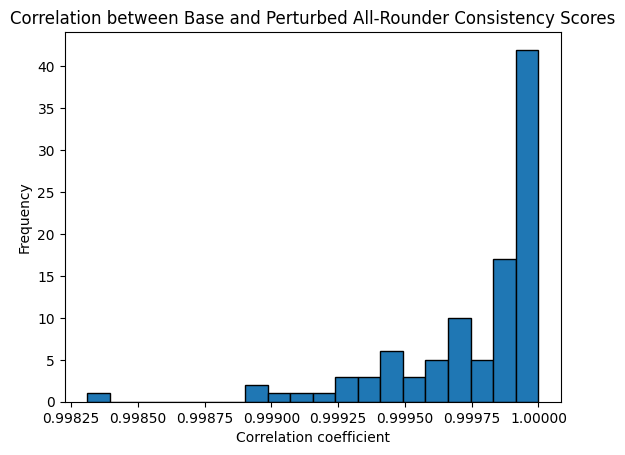

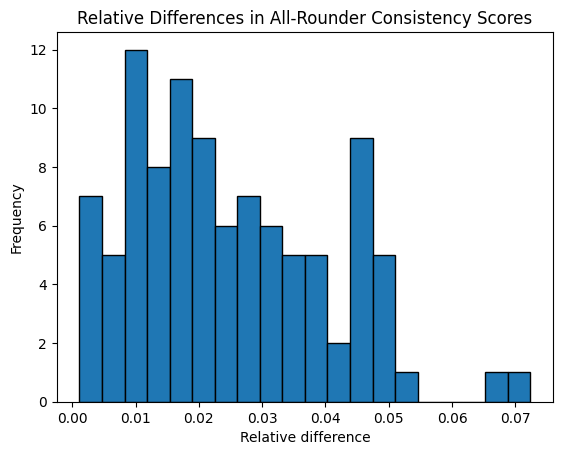

Mean correlation: 0.9997560685203856
Mean relative difference: 0.02484156239670751


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the all-rounder derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Boundaries_per_BF',
    'Runs_minus_Boundaries_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns'
]

# Define a function to compute the composite consistency score for all-rounders
def compute_consistency_score(df, weights):
    # Ensure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Drop rows with missing values in the relevant columns
data_clean = calculations_with_data[hybrid_weights_boosted.index].dropna()

# Recompute base scores using the cleaned data
base_scores = np.dot(data_clean.values, hybrid_weights_boosted.values)


# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(data_clean, perturbed_weights)

    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = []
for scores in perturbed_scores_list:
    # Check if the standard deviation of either set is zero to avoid undefined correlations
    if np.std(base_scores) == 0 or np.std(scores) == 0:
         correlations.append(np.nan)
    else:
         correlations.append(np.corrcoef(base_scores, scores)[0, 1])

# Filter out non-finite (NaN or inf) values from the correlations list
valid_correlations = [corr for corr in correlations if np.isfinite(corr)]

# Compute the mean relative difference between perturbed scores and base scores
base_mean_abs = np.mean(np.abs(base_scores))
if base_mean_abs == 0:
    relative_differences = [np.nan for _ in perturbed_scores_list]
else:
    relative_differences = [
        np.mean(np.abs(scores - base_scores)) / base_mean_abs
        for scores in perturbed_scores_list
    ]

# Filter out non-finite values from the relative differences
valid_relative_differences = [rd for rd in relative_differences if np.isfinite(rd)]

# Plot the distribution of correlation coefficients (if there are valid values)
if valid_correlations:
    plt.hist(valid_correlations, bins=20, edgecolor='k')
    plt.title("Correlation between Base and Perturbed All-Rounder Consistency Scores")
    plt.xlabel("Correlation coefficient")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid correlation values to plot.")

# Plot the distribution of relative differences (if there are valid values)
if valid_relative_differences:
    plt.hist(valid_relative_differences, bins=20, edgecolor='k')
    plt.title("Relative Differences in All-Rounder Consistency Scores")
    plt.xlabel("Relative difference")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid relative differences to plot.")

# Print summary statistics using only the valid values
if valid_correlations:
    print("Mean correlation:", np.mean(valid_correlations))
else:
    print("Mean correlation: No valid correlation values.")

if valid_relative_differences:
    print("Mean relative difference:", np.mean(valid_relative_differences))
else:
    print("Mean relative difference: No valid relative differences.")

# FINAL Form SCORE CALCULATION

### Consistency Score (Batting) Formula = (0.065828 × (Inns/Mat)) + (0.061717 × NO) + (0.079516 × SR) + (0.075132 × Ave) + (0.037506 × (50s + 2 × 100s)) + (0.116276 × Runs) + (0.034983 × (4s + 6s)) - (0.029042 × Zeros)

### Consistency Score (Bowling) Formula = (0.031319 × (Inns/Mat)) + (0.202824 × Wkts) - (0.085223 × Ave) - (0.060643 × Econ) - (0.033602 × (SR/100)) + (0.048447 × (4W + 1.25 × 5W)) + (0.037943 × Mdns)


### Form Score(allrounder) = Form Score(Batting) + Form Score(Bowler)


In [1]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/cleaned last season/lastseasonallrounder_smat.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

cols_to_convert = ["Bowl_Ave", "Econ", "Bowl_SR", "Wkts", "Mdns"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Define weights for Batting and Bowling formulas
batting_weights = {
    "Inns_per_Mat_Bat":0.164648,
    "NO": 0.123186,
    "SR_Bat": 0.191010,
    "Ave_Bat": 0.161246,
    "50s100s": 0.129686,
    "Runs": 0.111845,
    "Zeros": 0.020036,
    "boundary": 0.098342
}

bowling_weights = {
   "Inns_per_Mat_Bowl": 0.185,
    "Wkts": 0.305,
    "Overs" : 0.090,
    "Ave_Bowl": 0.115,
    "Econ": 0.160,
    "SR_Bowl": 0.070,
    "4W5W": 0.044,
    "Mdns": 0.031
}

cols_to_convert = ["Bowl_Ave", "Econ", "Bowl_SR", "Wkts", "Mdns", "Bat_Ave"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


# Compute necessary columns
df["Inns_per_Mat_Bat"] = df["Bat_Inns"] / df["Bat_Mat"]
df["50s100s"] = df["50's"] + 2 * df["100's"]
df["boundary"] = df["4s"] + df["6s"]
df["Inns_per_Mat_Bowl"] = df["Bowl_Inns"] / df["Bowl_Mat"]
df["4W5W"] = df["4W"] + 1.25 * df["5W"]

# Compute Batting Consistency Score
df["Batting_Consistency"] = (
    batting_weights["Inns_per_Mat_Bat"] * df["Inns_per_Mat_Bat"] +
    batting_weights["NO"] * df["NO"] +
    batting_weights["SR_Bat"] * df["Bat_SR"] +
    batting_weights["Ave_Bat"] * df["Bat_Ave"] +
    batting_weights["50s100s"] * df["50s100s"] +
    batting_weights["Runs"] * df["Bat_Runs"] +
    batting_weights["boundary"] * df["boundary"] -
    batting_weights["Zeros"] * df["Zeros"]
) * 0.6

# Compute Bowling Consistency Score
df["Bowling_Consistency"] = (
    bowling_weights["Inns_per_Mat_Bowl"] * df["Inns_per_Mat_Bowl"] +
    bowling_weights["Wkts"] * df["Wkts"] +
    bowling_weights["Overs"] * df["Overs"] -
    bowling_weights["Ave_Bowl"] * df["Bowl_Ave"] -
    bowling_weights["Econ"] * df["Econ"] -
    bowling_weights["SR_Bowl"] * (df["Bowl_SR"] / 100) +
    bowling_weights["4W5W"] * df["4W5W"] +
    bowling_weights["Mdns"] * df["Mdns"]
) * 0.6

# Compute All-Rounder Consistency Score
df["All_Rounder_Consistency"] = (df["Batting_Consistency"] + df["Bowling_Consistency"])/2

# Save the updated file
output_file = "Smat_allrounder_form_score.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as Smat_allrounder_form_score.xlsx


In [1]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/codes/Form/Smat_allrounder_form_score.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

# Convert relevant columns to numeric
cols_to_convert = ["Bat_Inns", "Bat_Mat", "NO", "Bat_SR", "Bat_Ave", "50's", "100's", "Bat_Runs", "Zeros", "4s", "6s",
                   "Bowl_Inns", "Bowl_Mat", "Bowl_Ave", "Econ", "Bowl_SR", "Wkts", "Mdns", "Overs", "4W", "5W"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Compute additional metrics
df["Inns_per_Mat_Bat"] = df["Bat_Inns"] / df["Bat_Mat"]
df["50s100s"] = df["50's"] + 2 * df["100's"]
df["boundary"] = df["4s"] + df["6s"]
df["Inns_per_Mat_Bowl"] = df["Bowl_Inns"] / df["Bowl_Mat"]
df["4W5W"] = df["4W"] + 1.25 * df["5W"]

# AHP Weights for Batting
ahp_batting_weights = {
    "Inns_per_Mat_Bat": 0.238540,
    "NO": 0.185249,
    "SR_Bat": 0.142373,
    "Ave_Bat": 0.108744,
    "50s100s": 0.082691,
    "Runs": 0.062666,
    "Zeros": 0.035732,
    "boundary": 0.047364
}

# PCA Weights for Batting
pca_batting_weights = {
    "Inns_per_Mat_Bat": 0.057886,
    "NO": 0.092667,
    "SR_Bat": 0.036661,
    "Ave_Bat": 0.108744,
    "50s100s": 0.086200,
    "Runs": 0.111868,
    "Zeros": 0.095046,
    "boundary": 0.110168
}

# AHP Weights for Bowling
ahp_bowling_weights = {
    "Inns_per_Mat_Bowl": 0.026934,
    "Wkts": 0.020319,
    "Overs": 0.090,
    "Ave_Bowl": 0.015383,
    "Econ": 0.011737,
    "SR_Bowl": 0.009089,
    "4W5W": 0.007218,
    "Mdns": 0.005960
}

# PCA Weights for Bowling
pca_bowling_weights = {
    "Inns_per_Mat_Bowl": 0.020897,
    "Wkts": 0.082935,
    "Overs": 0.090,
    "Ave_Bowl": 0.049695,
    "Econ": 0.034571,
    "SR_Bowl": 0.009089,
    "4W5W": 0.066772,
    "Mdns": 0.051989
}

# Compute AHP and PCA Batting Form Scores
df["Form_AHP_Bat"] = (
    ahp_batting_weights["Inns_per_Mat_Bat"] * df["Inns_per_Mat_Bat"] +
    ahp_batting_weights["NO"] * df["NO"] +
    ahp_batting_weights["SR_Bat"] * df["Bat_SR"] +
    ahp_batting_weights["Ave_Bat"] * df["Bat_Ave"] +
    ahp_batting_weights["50s100s"] * df["50s100s"] +
    ahp_batting_weights["Runs"] * df["Bat_Runs"] +
    ahp_batting_weights["boundary"] * df["boundary"] -
    ahp_batting_weights["Zeros"] * df["Zeros"]
) 


df["Form_PCA_Bat"] = (
    pca_batting_weights["Inns_per_Mat_Bat"] * df["Inns_per_Mat_Bat"] +
    pca_batting_weights["NO"] * df["NO"] +
    pca_batting_weights["SR_Bat"] * df["Bat_SR"] +
    pca_batting_weights["Ave_Bat"] * df["Bat_Ave"] +
    pca_batting_weights["50s100s"] * df["50s100s"] +
    pca_batting_weights["Runs"] * df["Bat_Runs"] +
    pca_batting_weights["boundary"] * df["boundary"] -
    pca_batting_weights["Zeros"] * df["Zeros"]
) 

# Compute AHP and PCA Bowling Form Scores
df["Form_AHP_Bowl"] = (
    ahp_bowling_weights["Inns_per_Mat_Bowl"] * df["Inns_per_Mat_Bowl"] +
    ahp_bowling_weights["Wkts"] * df["Wkts"] +
    ahp_bowling_weights["Overs"] * df["Overs"] -
    ahp_bowling_weights["Ave_Bowl"] * df["Bowl_Ave"] -
    ahp_bowling_weights["Econ"] * df["Econ"] -
    ahp_bowling_weights["SR_Bowl"] * (df["Bowl_SR"] / 100) +
    ahp_bowling_weights["4W5W"] * df["4W5W"] +
    ahp_bowling_weights["Mdns"] * df["Mdns"]
) 


df["Form_PCA_Bowl"] = (
    pca_bowling_weights["Inns_per_Mat_Bowl"] * df["Inns_per_Mat_Bowl"] +
    pca_bowling_weights["Wkts"] * df["Wkts"] +
    pca_bowling_weights["Overs"] * df["Overs"] -
    pca_bowling_weights["Ave_Bowl"] * df["Bowl_Ave"] -
    pca_bowling_weights["Econ"] * df["Econ"] -
    pca_bowling_weights["SR_Bowl"] * (df["Bowl_SR"] / 100) +
    pca_bowling_weights["4W5W"] * df["4W5W"] +
    pca_bowling_weights["Mdns"] * df["Mdns"]
) 

# Compute All-Rounder Form Scores
df["Form_AHP_AllRounder"] = (df["Form_AHP_Bat"] + df["Form_AHP_Bowl"]) / 2
df["Form_PCA_AllRounder"] = (df["Form_PCA_Bat"] + df["Form_PCA_Bowl"]) / 2

# Save the updated file
output_file = "allrounder_data_AHP_PCA_score.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as allrounder_data_AHP_PCA_score.xlsx
